# This jupyter notebook test the VERT_FSFB3.py function with a sample $N^2$ profile in the California coastal region

In [1]:
import numpy as np
import scipy
import gsw
import xarray as xr
import cmocean as cmo
from numpy import linalg as LA

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# First we calculate the Brunt-Vaisla frequency squared with a sample dataset.

In [3]:
import numpy as np
import scipy
import gsw
import xarray as xr
import cmocean as cmo
from numpy import linalg as LA
from scipy import linalg

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [5]:
state_ds = xr.open_dataset('../../Rossby_wave_test_case/MARA_RUN2_SWOT_state_2015-01-06.nc')
state_ds #.PHIHYD #, state_ds.DRHODR

<xarray.Dataset>
Dimensions:  (XC: 672, XG: 672, YC: 576, YG: 576, Zp1: 91, Z: 90, Zl: 90, Zu: 90)
Coordinates: (12/33)
  * XC       (XC) float32 230.0 230.0 230.1 230.1 ... 243.9 243.9 243.9 244.0
  * XG       (XG) float32 230.0 230.0 230.0 230.1 ... 243.9 243.9 243.9 244.0
    rA       (YC, XC) float32 ...
    dxG      (YG, XC) float32 ...
    dyG      (YC, XG) float32 ...
    Depth    (YC, XC) float32 ...
    ...       ...
  * Zl       (Zl) float32 0.0 -1.0 -2.14 ... -5.682e+03 -6.082e+03 -6.52e+03
    drF      (Z) float32 ...
    PHrefC   (Z) float32 ...
    rhoRef   (Z) float32 ...
    iter     int32 ...
    time     datetime64[ns] ...
Data variables:
    THETA    (Z, YC, XC) float32 ...
    SALT     (Z, YC, XC) float32 ...
    UVEL     (Z, YC, XG) float32 ...
    VVEL     (Z, YG, XC) float32 ...
    WVEL     (Zl, YC, XC) float32 ...
    PHIHYD   (Z, YC, XC) float32 ...
    DRHODR   (Zl, YC, XC) float32 ...
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(grid_dir='/data/SO2/SWO...

In [6]:
LAT, LON = state_ds.YC.data, state_ds.XC.data

In [7]:
lat, lon = np.meshgrid(LAT, LON)

# Read Temperature, Salinity and Pressure data

In [8]:
temp = state_ds.THETA
salinity = state_ds.SALT
Z = state_ds.Z
pres_anomalies  =  state_ds.PHIHYD

# Calculate Brunt-Vaisla frequency squared

In [9]:
SA, CT = np.ma.masked_all(salinity.shape), np.ma.masked_all(temp.shape)
Nsquared = np.ma.masked_all([salinity.shape[0]-1,salinity.shape[1], salinity.shape[2]])
Pressure_mid = np.ma.masked_all([salinity.shape[0]-1,salinity.shape[1], salinity.shape[2]])
pres = np.ma.masked_all([salinity.shape[0],salinity.shape[1], salinity.shape[2]])
Z_mid = np.ma.masked_all([salinity.shape[0]-1, salinity.shape[1], salinity.shape[2]])
for y in range(SA.shape[1]):
    for x in range(SA.shape[2]):
        pres[:, y, x] = gsw.p_from_z(Z.data,  lat = LAT[y]) #+ pres_anomalies.data[:, y, x]
        SA[:, y, x] = gsw.conversions.SA_from_SP(salinity.data[:, y, x], pres.data[:, y, x], LON[x], LAT[y])
        CT[:, y, x] = gsw.CT_from_pt(SA.data[:, y, x], temp.data[:, y, x])  
        Nsquared[:, y, x], Pressure_mid[:, y, x] = gsw.stability.Nsquared(SA[:, y, x], CT[:, y, x], pres[:, y, x])
        Z_mid[:, y, x] = gsw.z_from_p(Pressure_mid[:, y, x] , lat = LAT[y])

In [10]:
xlon, ylat = np.meshgrid(LON, LAT)

In [11]:
zz, yy = np.meshgrid(Z[1:], LAT)

In [12]:
#pres[:, 100, 120], pres[: , 9, 10]

### Choose a vector at a random location

In [13]:
laty, lonx = 130, 220
#DEPTH[laty, lonx].data

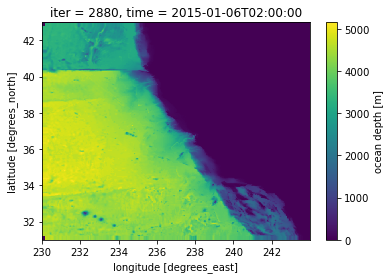

In [14]:
DEPTH = state_ds.Depth
DEPTH.plot()
#plt.plot(laty, lonx, 'x', color = 'red')

## Interpolate the N2 vector onto a uniform pressure grid

In [15]:
N2_vector = Nsquared[:, laty, lonx]
Pmid_vector = Pressure_mid[:, laty, lonx]
#Pmid_vector, N2_vector
for i in range(len(N2_vector)-1):
    if N2_vector[i] < 0:
        N2_vector[i] = N2_vector[i+1] #np.median(np.absolute(N2_vector))
    if N2_vector[i] == 0:
        N2_vector[i] = N2_vector[i+1] #np.median(np.absolute(N2_vector))

In [16]:
Pmid_uniform = np.arange(Pmid_vector[0], Pmid_vector[-1], step = 120)
N2_uniform = np.interp(Pmid_uniform, Pmid_vector[:-2], N2_vector[:-2])

In [17]:
Pmid_uniform = Pmid_uniform[:]
N2_uniform = N2_uniform[:]
Pmid_uniform[:-16], N2_uniform[:-16]

(array([1.04241389e+00, 1.21042414e+02, 2.41042414e+02, 3.61042414e+02,
        4.81042414e+02, 6.01042414e+02, 7.21042414e+02, 8.41042414e+02,
        9.61042414e+02, 1.08104241e+03, 1.20104241e+03, 1.32104241e+03,
        1.44104241e+03, 1.56104241e+03, 1.68104241e+03, 1.80104241e+03,
        1.92104241e+03, 2.04104241e+03, 2.16104241e+03, 2.28104241e+03,
        2.40104241e+03, 2.52104241e+03, 2.64104241e+03, 2.76104241e+03,
        2.88104241e+03, 3.00104241e+03, 3.12104241e+03, 3.24104241e+03,
        3.36104241e+03, 3.48104241e+03, 3.60104241e+03, 3.72104241e+03,
        3.84104241e+03, 3.96104241e+03, 4.08104241e+03, 4.20104241e+03,
        4.32104241e+03, 4.44104241e+03, 4.56104241e+03, 4.68104241e+03]),
 array([-1.37953541e-06,  1.03457809e-04,  4.86595224e-05,  2.21734338e-05,
         1.54314519e-05,  1.03236683e-05,  8.02232809e-06,  6.98439760e-06,
         5.90567711e-06,  5.18057014e-06,  4.45625501e-06,  4.01132800e-06,
         3.47442524e-06,  3.03638295e-06,  2.98300

In [18]:
import VERT_FSFB3

In [19]:
c2, Psi, G, N2, Pmid = VERT_FSFB3.VERT_FSFB3(N2_uniform[:-16], Pmid_uniform[:-16])

In [20]:
g = 9.81 # gravity

## With a rigid lid assumpsion, SSH = Gm/g, where g is gravity, since hydrastatic pressure p = $rho * g *  SSH$

In [21]:
SSH = G/g

In [22]:
Z_mid_uniform  = gsw.z_from_p(np.append(0,Pmid), lat = laty)

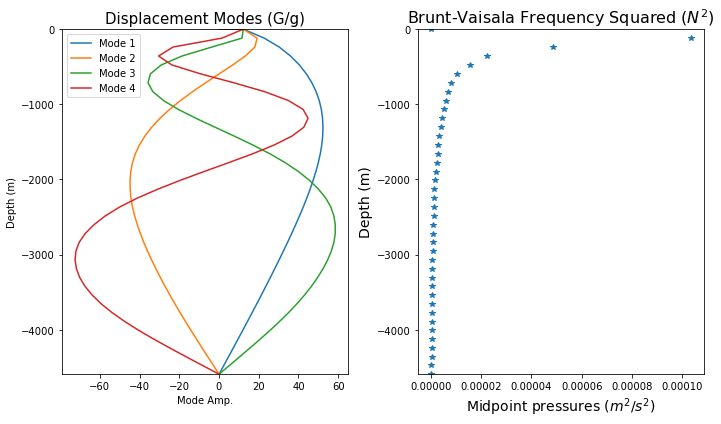

In [23]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.plot(SSH[:,0], Z_mid_uniform, label = 'Mode 1')
plt.plot(SSH[:,1], Z_mid_uniform, label = 'Mode 2')
plt.plot(SSH[:,2], Z_mid_uniform, label = 'Mode 3')
plt.plot(SSH[:,3], Z_mid_uniform, label = 'Mode 4')
#plt.plot(SSH[:,4], Z_mid_uniform, label = 'Mode 5')
plt.xlabel('Mode Amp.')
plt.ylabel('Depth (m)')
#plt.xlim([-.2, .2])
plt.ylim([Z_mid_uniform.min(), 0])
plt.legend()
plt.title('Displacement Modes (G/g)', fontsize = 15)

plt.subplot(122)
plt.title('Brunt-Vaisala Frequency Squared ($N^2$)', fontsize = 16)
plt.plot(N2, Z_mid_uniform[1:], '*')
#plt.plot(Pmid_vector[:], N2_vector,  linewidth  = 2.0)
plt.xlabel('Midpoint pressures (${m^2}/{s^2}$)', fontsize = 14)
plt.ylabel('Depth (m)', fontsize = 14)
#plt.xlim([10, 350])
plt.ylim([Z_mid_uniform.min(), 0])

plt.tight_layout()
plt.savefig('vertical_modes_N2_sample_CCS_lon_' + str(lonx) + '_lat_' + str(laty) +'.png')

In [24]:
MODE = G.shape[-1]

In [25]:
Zgrid, mode = np.meshgrid(Z_mid_uniform, range(MODE) )

/var/folders/4w/wvmyk9216kl39tqqrtqcndl80000gn/T/ipykernel_33274/53837551.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(mode, Zgrid, SSH[:].T, cmap = cmo.cm.balance)
/var/folders/4w/wvmyk9216kl39tqqrtqcndl80000gn/T/ipykernel_33274/53837551.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(mode, Zgrid,G[:].T, cmap = cmo.cm.curl)
/var/folders/4w/wvmyk9216kl39tqqrtqcndl80000gn/T/ipykernel_33274/53837551.py:25: MatplotlibDeprec

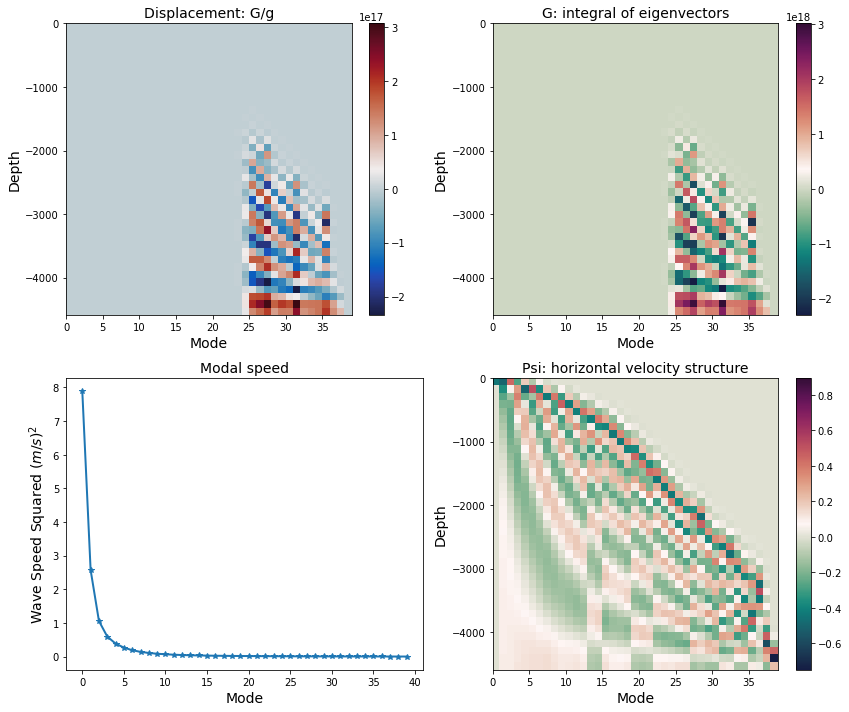

In [26]:
plt.figure(figsize = (12, 10))
plt.subplot(221)
plt.title('Displacement: G/g', fontsize = 14)
plt.pcolormesh(mode, Zgrid, SSH[:].T, cmap = cmo.cm.balance)
plt.ylabel('Depth', fontsize = 14)
plt.xlabel('Mode', fontsize = 14)
plt.colorbar()

plt.subplot(222)
plt.title('G: integral of eigenvectors', fontsize = 14)
plt.pcolor(mode, Zgrid,G[:].T, cmap = cmo.cm.curl)
plt.ylabel('Depth', fontsize = 14)
plt.xlabel('Mode', fontsize = 14)
plt.colorbar()

plt.subplot(223)
plt.title('Modal speed' , fontsize = 14)
plt.plot(c2[:], "-*", linewidth = 2)
plt.ylabel('Wave Speed Squared $(m/s)^2$', fontsize = 14)
plt.xlabel('Mode', fontsize = 14)
#plt.colorbar()

plt.subplot(224)
plt.title('Psi: horizontal velocity structure' , fontsize = 14)
plt.pcolor(mode, Zgrid, Psi[:].T, cmap = cmo.cm.curl)
plt.ylabel('Depth', fontsize = 14)
plt.xlabel('Mode', fontsize = 14)
plt.colorbar()

plt.tight_layout()
plt.savefig('vertical_modes_FSFB2_N2_sample_lon_' + str(lonx) + '_lat_' + str(laty) +'.png', dpi = 100)

### Beta plane paramters

In [27]:
# wavespeed = # -c2[0]
Phi0 = 30 # central latitude (φ0)
Omega = 7.2921159e-5 # Ω is the angular speed of the earth
Earth_radius = 6.371e6 # meters
Beta = 2 * Omega * np.cos(Phi0) / Earth_radius
f0 = 2 * Omega * np.sin(Phi0) #1.0313e-4 # 45 N
# Gradient of Coriolis parameter f = f0 + beta * (y-y0) 
# The constant β (the Rossby parameter) is given its value at a central latitude (φ0) on the spherical earth, 
# (2Ω cosφ0)/a, where Ω is the angular speed of the earth and a its mean radius. 
Beta

3.53106090197239e-12

## Choose a wave with 200-km wavelength that moves westward (negative wave speed). 

In [28]:
wavelength = 2e5 # 200km
wavespeed = c2 # m/s 
np.sqrt(wavespeed) #,c2

array([2.80828358, 1.60369215, 1.02817277, 0.77103959, 0.62040805,
       0.5161477 , 0.434165  , 0.37309836, 0.3262904 , 0.28859858,
       0.25986607, 0.23491943, 0.21233893, 0.1940874 , 0.18102108,
       0.16861631, 0.1559316 , 0.14576783, 0.13587339, 0.12796589,
       0.11905737, 0.11187579, 0.10494376, 0.09829021, 0.09144002,
       0.08481305, 0.07863518, 0.0748963 , 0.07069583, 0.06554803,
       0.06090993, 0.05776331, 0.05494355, 0.05168081, 0.04919445,
       0.04691684, 0.04581211, 0.03573903, 0.02020586, 0.01962096])

## The dispersion relation relates frequency to wavenumber for each mode:

In [29]:
k_n = 2 * np.pi / wavelength # wavenumber
k_n

3.141592653589793e-05

## Rossby deformation radius Rm = c/f0 = 50.6 km, consistent with Chelton et al. (1998) https://ceoas.oregonstate.edu/rossby_radius

In [30]:
Rm = wavespeed / f0
Rm[0]/1000, f0

(-54.73026096765938, -0.00014409682231500762)

In [31]:
freq_n = (Beta * k_n) / (k_n ** 2  + Rm[0] ** -2)
freq_n

8.398780091117902e-08

## SSH First Baroclinic mode

### Amplitude

In [ ]:
Amn, Bmn = 0.5, 1.5 #Amn = amp[0, 1]*Psi[0, 1], 

In [ ]:
X_loc = np.arange(0, 1e6, .2e4)
T_time = np.arange(0, 100e5, .2e4)

In [ ]:
SSH = np.ma.masked_all([len(X_loc), len(T_time)])
for xx in range(len(X_loc)):
    for tt in range(len(T_time)):
        SSH[xx, tt] = Amn * np.cos(k_n * X_loc[xx] + freq_n * T_time[tt]) + Amn * np.sin(k_n * X_loc[xx] + freq_n * T_time[tt])

In [ ]:
XX, TT = np.meshgrid(X_loc/1000, T_time/86400)

### Amplitude

In [38]:
Amn, Bmn = 0.5, 1.5 #Amn = amp[0, 1]*Psi[0, 1], 

In [39]:
SSH_AB = np.ma.masked_all([len(X_loc), len(T_time)])
for xx in range(len(X_loc)):
    for tt in range(len(T_time)):
        SSH_AB[xx, tt] = Amn*np.cos(k_n * X_loc[xx] + freq_n*T_time[tt]) + Bmn*np.sin(k_n*X_loc[xx] + freq_n*T_time[tt])

/var/folders/4w/wvmyk9216kl39tqqrtqcndl80000gn/T/ipykernel_33274/2803443315.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX[:, :], TT[:, :], SSH_AB[ :].T, cmap = cmo.cm.balance)


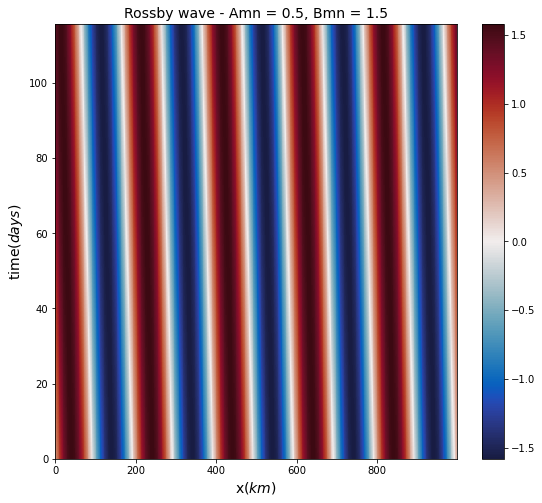

In [40]:
plt.figure(figsize=(9, 8))
plt.title('Rossby wave - Amn = 0.5, Bmn = 1.5', fontsize = 14)
plt.pcolormesh(XX[:, :], TT[:, :], SSH_AB[ :].T, cmap = cmo.cm.balance)
plt.colorbar()
plt.ylabel('time($days$)', fontsize = 14)
plt.xlabel('x($km$)', fontsize = 14)
plt.savefig('rossby_wave_1stmode_AB.png', dpi = 100)

In [41]:
ds_output = xr.Dataset(data_vars={'SSH' : (('time', 'x'), SSH_AB.T),
                                  'time' : (('time'), T_time),
                                  'x' : (('x'), X_loc)},
                      attrs = dict(description=('Rossby wave SSH(x, t) with first baroclinic mode, Amn = 0.5, Bmn = 1.5.')))
ds_output.to_netcdf('./Rossby_wave_1st_mode_AB.nc')

### Expand SSH to 2-dimensional space - SSH(x, y, t)

In [42]:
Rm = wavespeed / f0
Rm[0]/1000, f0

(-54.73026096765938, -0.00014409682231500762)

In [43]:
wavelength_l = .5 * wavelength
l_n = 2 * np.pi / wavelength_l # wavenumber
l_n, k_n, wavelength, wavelength_l

(6.283185307179586e-05, 3.141592653589793e-05, 200000.0, 100000.0)

In [44]:
freq_n = (Beta * k_n) / (k_n ** 2 + l_n ** 2 + Rm[0] ** -2)
freq_n

2.1055034485678825e-08

In [45]:
X_loc = np.arange(0, 1e6, 1e4)
Y_loc = np.arange(0, 1e6, 1e4)
T_time = np.arange(0, 1000e5, 1e6)

In [46]:
SSH_XYT = np.ma.masked_all([len(T_time), len(X_loc), len(Y_loc)])
for xx in range(len(X_loc)):
    for yy in range(len(Y_loc)):
        for tt in range(len(T_time)):
            SSH_XYT[tt, xx, yy] = Amn*Psi[0, 0]*np.cos(k_n * X_loc[xx] + l_n*Y_loc[yy] + freq_n*T_time[tt]) + Bmn*Psi[0, 0]*np.sin(k_n*X_loc[xx] + l_n*Y_loc[yy] + freq_n*T_time[tt])

### Batch plot and make movie

### Select three snapshots in SSH(t, x, y) and we have reasons to believe there is a linear relationship between y and H:
### y = Hx + r
### where H is an N by 2M regressor matrix (elements of H are sinines and cosines), x are the 2M model parameters, and r represents the N-element time series. 
### Here  we are solving for the unknown model parameter x, which are estimated by x^ such that the expected sum of the squares of the model parameter errors is minimized. This is done by calculating x^as the Bayesian maximum as posyeriori (MAP) estimate.

### General sampling operator 

#### Moorings - point locations

In [52]:
mooring_points_x = np.arange(10, 20)
mooring_points_y = np.repeat(50, 10)
mooring_points_x, mooring_points_y

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 array([50, 50, 50, 50, 50, 50, 50, 50, 50, 50]))

In [54]:
y_mooring = SSH_XYT[21, mooring_points_x, mooring_points_y]
y_mooring.shape

(10,)

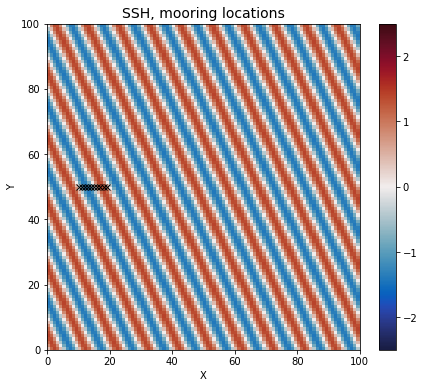

In [55]:
fig = plt.figure(figsize = (7, 6))
plt.pcolor(SSH_XYT[0],cmap = cmo.cm.balance, vmin = -2.5, vmax  = 2.5)
plt.title('SSH, mooring locations', fontsize = 14)
plt.plot(mooring_points_x, mooring_points_y, 'x', color = 'black')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

### Elements of H

In [56]:
H_cos, H_sin = np.ma.masked_all([len(T_time), len(X_loc), len(Y_loc)]), np.ma.masked_all([len(T_time), len(X_loc), len(Y_loc)])
for xx in range(len(X_loc)):
    for yy in range(len(Y_loc)):
        for tt in range(len(T_time)):
            H_cos[tt, xx, yy] = Psi[0, 0]*np.cos(k_n * X_loc[xx] + l_n*Y_loc[yy] + freq_n*T_time[tt]) 
            H_sin[tt, xx, yy] = Psi[0, 0]*np.sin(k_n * X_loc[xx] + l_n*Y_loc[yy] + freq_n*T_time[tt])

In [57]:
H_ = np.ma.masked_all([2, len(T_time), len(X_loc), len(Y_loc)])
H_[0], H_[1] = H_cos[:], H_sin
#H_matrix = np.vstack([H_[:, 0].data, H_[:, 21].data]).reshape(4, 10000)
H_matrix = H_[:, 21, mooring_points_x, mooring_points_y].data.T
H_matrix.shape, #H_.shape, #H_cos.shape

((10, 2),)

### Ordinary Least Squares (OLS) Solution
#### The solution is $X_{OLS}$ = $(H^TH)^{-1}H^Ty$
#### Solution: Amn, Bmn = 0.5, 1.5  

In [58]:
M, N = len(y_mooring), 2

In [59]:
H_inv = LA.inv(np.matmul(H_matrix.T, H_matrix))
H_inv.shape

(2, 2)

In [60]:
#H_inv, y_mooring.shape

In [61]:
X_OLS = np.matmul(np.matmul(H_inv, H_matrix.T), y_mooring)

In [62]:
X_OLS

masked_array(data=[0.5, 1.5],
             mask=False,
       fill_value=1e+20)

In [63]:
np.matmul(H_inv, H_matrix.T).shape

(2, 10)

### Weighted least square solution

In [64]:
num_samples = len(T_time)
noise_std = 0.1

In [65]:
white_noise = np.random.normal(0, noise_std, size = num_samples)

Text(0.5, 1.0, 'white noise, std = .25')

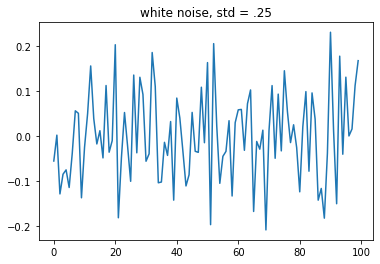

In [66]:
plt.plot(white_noise)
plt.title('white noise, std = .25')

In [67]:
SSH_WN = np.ma.masked_all(SSH_XYT.shape)
white_noise_x, white_noise_y = np.ma.masked_all(SSH_XYT.shape), np.ma.masked_all(SSH_XYT.shape)
for tt in range(len(T_time)):
    for yy in range(len(Y_loc)):
        white_noise_y[tt, yy] = np.random.normal(0, noise_std, size = num_samples)
        SSH_WN[tt, yy] = SSH_XYT[tt, yy]  + white_noise_y[tt, yy]

In [68]:
y_mooring = SSH_WN[21, mooring_points_x, mooring_points_y]
y_mooring.shape

(10,)

In [69]:
white_noise_y.shape

(100, 100, 100)

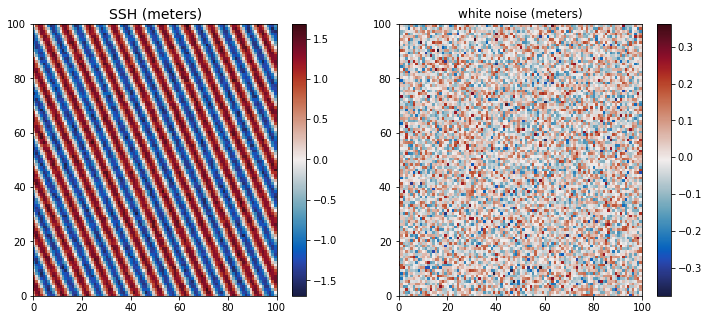

In [70]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.pcolor(SSH_WN[0],cmap = cmo.cm.balance, )
plt.title('SSH (meters)', fontsize = 14)
plt.colorbar()

plt.subplot(122)
plt.pcolor(white_noise_y[0],cmap = cmo.cm.balance,)
plt.title('white noise (meters)')
plt.colorbar()


### Residual: processes that are not considered "signals" in this analysis, here we dictate the standard deviation to be the redidual first

### Elements of H

In [71]:
H_ = np.ma.masked_all([2, len(T_time), len(X_loc), len(Y_loc)])
H_[0], H_[1] = H_cos[:], H_sin[:]
H_matrix = H_[:, 21, mooring_points_x, mooring_points_y].data.T
H_matrix.shape, #H_.shape, #H_cos.shape

((10, 2),)

In [72]:
residual= SSH_WN[:, mooring_points_x, mooring_points_y].std() # = n * sigma **2

In [73]:
residual

0.9645177751938303

#### R Matrix

In [74]:
R_ = np.eye(M, M)

In [75]:
for ii in range(M):
    R_[ii, ii] = (residual * 0.7) ** 2 #. half of the variance is noise
R_

array([[0.45584432, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.45584432, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.45584432, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.45584432, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.45584432,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.45584432, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.45584432, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

#### P matrix =0 For now

In [76]:
A = np.matmul(H_matrix.T, LA.inv(R_))

In [77]:
B = np.matmul(A, H_matrix)

In [78]:
D = np.matmul(np.matmul(LA.inv(B), H_matrix.T) , LA.inv(R_))

In [79]:
X_ = np.matmul(D, y_mooring)

In [80]:
D.shape #, LA.inv(D)

(2, 10)

In [81]:
X_

masked_array(data=[0.46832652, 1.54270907],
             mask=False,
       fill_value=1e+20)

In [82]:
C = np.matmul(H_matrix.T, H_matrix) # No noise setup

In [83]:
X_no_noise = np.matmul(np.matmul(LA.inv(C) , H_matrix.T) , y_mooring.data) # assume no noise

In [84]:
X_no_noise

array([0.46832652, 1.54270907])

In [85]:
### Mapping Error